# Avocado Prices Analysis and Prediction


Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold


## İmport Libraries

In [1]:
#data analysis libraries 
import numpy as np
import pandas as pd
import datetime

#visualization libraries
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Data PreProcessing 


In [2]:
data = pd.read_csv('avocado.csv') #read to data

data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


### EXPLORATORY DATA ANALYSIS

In [3]:
data['XLarge Bags'].max()

551693.65

In [4]:
data.keys()

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [5]:
data = data.drop(['Unnamed: 0'], axis = 1) #drop the useless column

In [6]:
# Dataset Correlation
data.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


In [7]:
# names = ["date", "avprice", "totalvol", "small","large","xlarge","totalbags","smallbags","largebags","xlargebags","type","year","region"] #get new column names
# data = data.rename(columns=dict(zip(data.columns, names))) #rename columns

- I want to look at data types and take positions accordingly

In [8]:
print(data["type"].value_counts(dropna=False))  #Shows the number of different avocado types

conventional    9126
organic         9123
Name: type, dtype: int64


In [9]:
print(data["year"].value_counts(dropna=False))

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


In [10]:
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [12]:
dates = [datetime.datetime.strptime(ts, "%Y-%m-%d") for ts in data['Date'].astype('str')]
sorteddates = [datetime.datetime.strftime(ts, "%Y-%m-%d") for ts in dates]
data['Date'] = pd.DataFrame({'Date':sorteddates})
data['Day'], data['Month'],  data['Year'] = data['Date'].str.split('-').str

- When I look at data types, I see that date is not datetime, so I will solve this problem and sort the data by date. Then I will divide the dates into day-month-year for a better analysis.

In [13]:
data.head(10)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month,Year
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,2015,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,2015,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,2015,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,2015,12,06
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,2015,11,29
5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany,2015,11,22
6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany,2015,11,15
7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany,2015,11,08
8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany,2015,11,01
9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany,2015,10,25


- Now I got Sorted data let's do some visualizations

## Visualizations

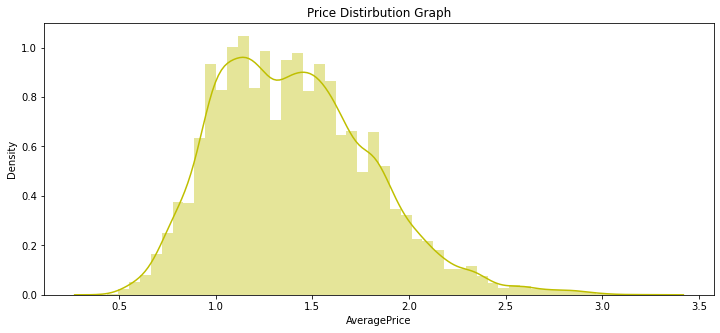

In [14]:
plt.figure(figsize=(12,5))
plt.title("Price Distirbution Graph")
ax = sns.distplot(data["AveragePrice"], color = 'y')

- Here we can see that the weight is in the price range of $ 1.15

### Weight distribution of prices

<AxesSubplot:xlabel='AveragePrice'>

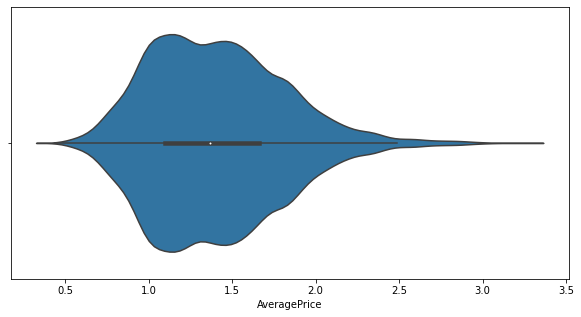

In [15]:
import seaborn as sns
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
sns.violinplot(data.dropna(subset = ['AveragePrice']).AveragePrice)

### Price distribution graph in general

Text(0.5, 1.0, 'Average Price')

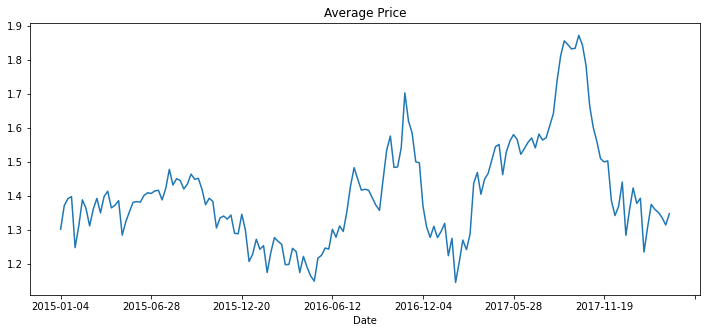

In [16]:
dategroup=data.groupby('Date').mean()
plt.figure(figsize=(12,5))
dategroup['AveragePrice'].plot(x=data.Date)
plt.title('Average Price')

### Change of average price per calendar year

- This is important because seasonal changes can affect prices.

Text(0.5, 1.0, 'Average Price by Month')

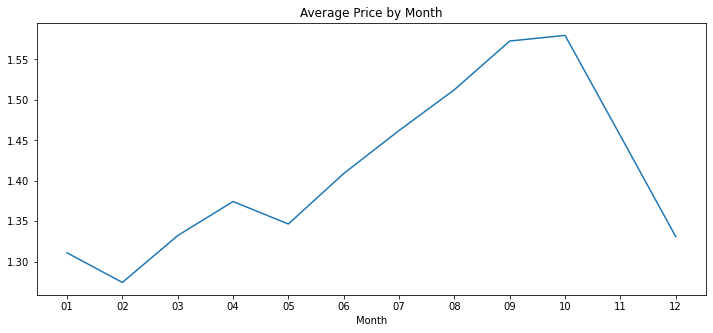

In [17]:
dategroup=data.groupby('Month').mean()
fig, ax = plt.subplots(figsize=(12,5))
ax.xaxis.set(ticks=range(0,13)) # Manually set x-ticks
dategroup['AveragePrice'].plot(x=data.Month)
plt.title('Average Price by Month')

### Changes in prices by day of month
- Which is again a significant chart reason for us on certain days of the week discounts

Text(0.5, 1.0, 'Average Price by Day')

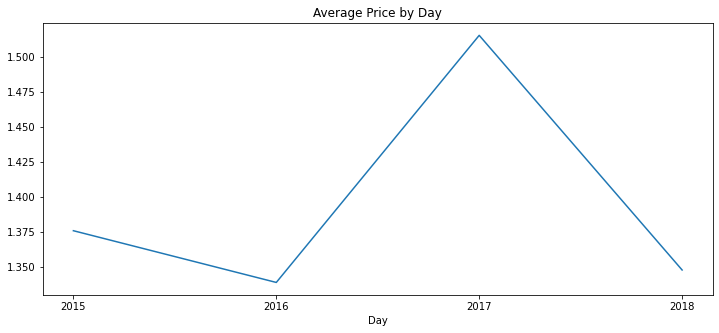

In [18]:
dategroup=data.groupby('Day').mean()
fig, ax = plt.subplots(figsize=(12,5))
ax.xaxis.set(ticks=range(0,31)) # Manually set x-ticks
dategroup['AveragePrice'].plot(x=data.Day)
plt.title('Average Price by Day')

### Yearly Average Price in Each Region
- Again an extremely important graphic reason for us is the price change between the states

Text(0.5, 1.0, 'Yearly Average Price in Each Region')

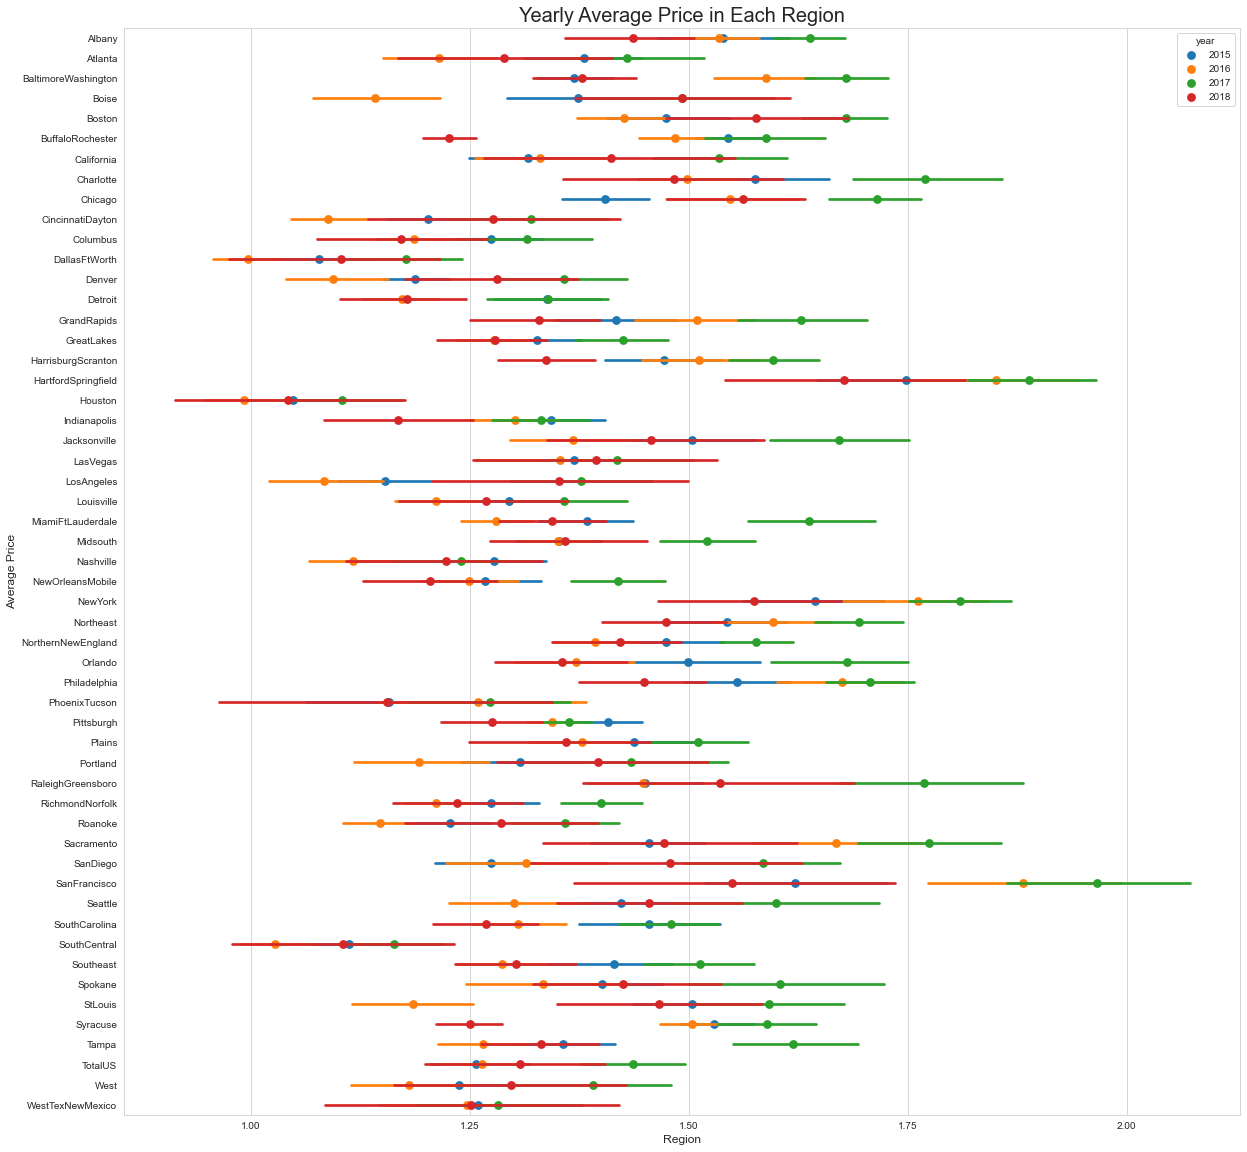

In [19]:
plt.figure(figsize=(20,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice',y='region',data=data, hue='year',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('Region',{'fontsize' : 'large'})
plt.ylabel('Average Price',{'fontsize':'large'})
plt.title("Yearly Average Price in Each Region",{'fontsize':20})

### Type Average Price in Each Region
- In this chart, we can see price changes according to type in cities, organic avocado is more expensive as a standard

Text(0.5, 1.0, 'Type Average Price in Each Region')

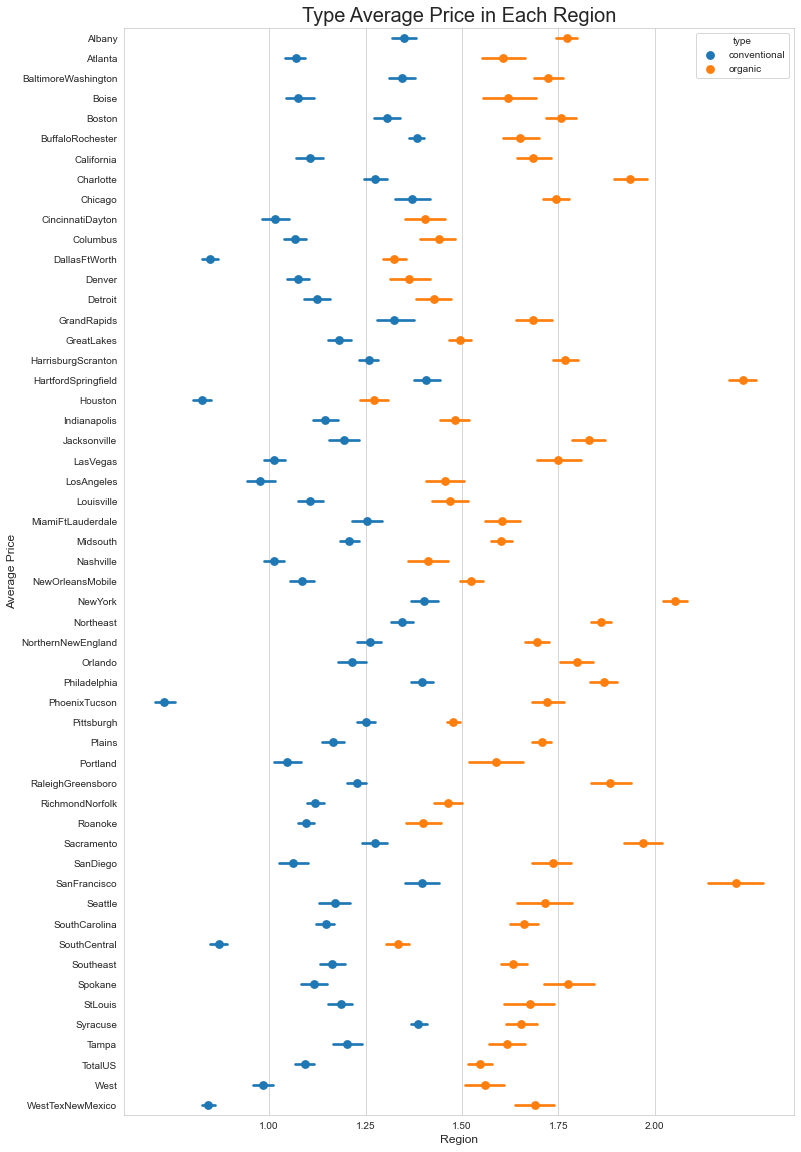

In [20]:
plt.figure(figsize=(12,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice',y='region',data=data, hue='type',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('Region',{'fontsize' : 'large'})
plt.ylabel('Average Price',{'fontsize':'large'})
plt.title("Type Average Price in Each Region",{'fontsize':20})

- Here we look at the type distribution in the dataset.

conventional    9126
organic         9123
Name: type, dtype: int64


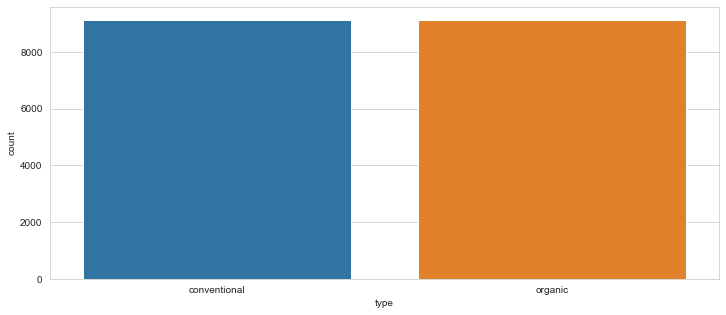

In [21]:
print(data['type'].value_counts())
plt.figure(figsize=(12,5))
sns.countplot(data['type'])
plt.show()

<AxesSubplot:xlabel='Month'>

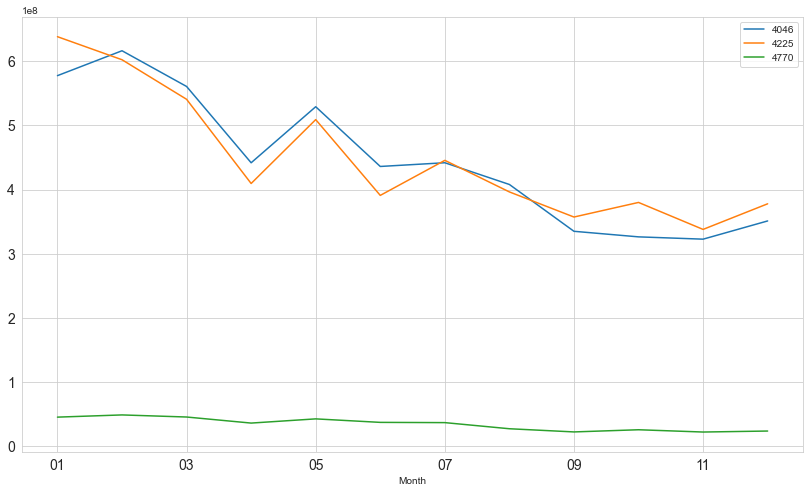

In [22]:
variant = data[['4046', '4225', '4770']].groupby(data.Month).sum()
variant.plot(kind='line', fontsize = 14, figsize=(14,8))

In [23]:
#sns.pairplot(data.iloc[:,7:10], palette="husl",height=5.5)

In [24]:
#print(data.boxplot(column="AveragePrice",by="year"))

## Machine Lerning Model

In [25]:
y= data[["type"]][:]
y

,type
0,conventional
1,conventional
2,conventional
3,conventional
4,conventional
...,...
18244,organic
18245,organic
18246,organic
18247,organic


In [26]:
from sklearn.preprocessing import StandardScaler
# le = LabelEncoder()
# d1 = le.fit_transform(d1.all)

# d2 = le.fit_transform(d2)

In [27]:
x = data.drop(["Date","type","region"],axis=1,inplace=True)

x = data.iloc[:,:]
x

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Day,Month,Year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,2015,12,06
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,2018,02,04
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,2018,01,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,2018,01,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,2018,01,14


In [28]:
#Scale the data to be between -1 and 1
sc = StandardScaler()
x = sc.fit_transform(x)

In [29]:
y

,type
0,conventional
1,conventional
2,conventional
3,conventional
4,conventional
...,...
18244,organic
18245,organic
18246,organic
18247,organic


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
# Creating Train and Test Datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [32]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV 

In [33]:
# Model List
models = [] 
models.append(('LR', LogisticRegression())) 
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC())) 
models.append(('NB', GaussianNB()))
models.append(('DTC', DecisionTreeClassifier()))

In [36]:
# evaluate models using cross validation score:
results = [] 
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=42) 
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy') 
    results.append(cv_results) 
    names.append(name) 
    print("Model Name:{} Model Acc:{:.3f} Model Std:{:.3f}".format(name, cv_results.mean(), cv_results.std()))

Model Name:LR Model Acc:0.917 Model Std:0.005
Model Name:KNN Model Acc:0.884 Model Std:0.010
Model Name:SVM Model Acc:0.920 Model Std:0.004
Model Name:NB Model Acc:0.866 Model Std:0.010
Model Name:DTC Model Acc:0.984 Model Std:0.002


In [37]:
# Time to use DFC for dataset:
dtc = DecisionTreeClassifier(criterion="entropy")
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)

In [39]:
#confussion matrix: 
from sklearn.metrics import confusion_matrix
dtc_cm = confusion_matrix(y_test,y_pred)
dtc_cross = pd.crosstab(y_test["type"], y_pred,rownames=['Actual Values'], colnames=['Predicted Values'])
dtc_acc = metrics.accuracy_score(y_test, y_pred)
print(dtc_cross)
print(dtc_acc)

Predicted Values  conventional  organic
Actual Values                          
conventional              2936       53
organic                     30     3004
0.9862194919475344


In [41]:
# Best Model is DecisionTreeClassifier Model

In [40]:
import joblib

joblib.dump(dtc, 'Avovado_DTC.obj')

['Avovado_DTC.obj']